# $M_D$ vs $v_S\approx m_{\chi^0_1}$ analog to the SD majorana DM: $h_d=0.01$

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 

# PMNS matrix 2018 to $3\sigma$ https://arxiv.org/abs/1708.01186

In [3]:
import NEUTRINO2018
import neutrino_analytic2

In [82]:
#!/usr/bin/env python

import pyslha
import pySDdiracDM_LesHouches_generator
import numpy as np
import pandas as pd
import subprocess
import time
import sys

# Tiempo inicial
t1=time.time() 

#Open xdict which is now a <PySLHA Doc: 10 blocks, 0 decays, 0 xsections>
xdict = pySDdiracDM_LesHouches_generator.buildSLHAinFile()

x=[]

#times to run the program. Entry using the keyboard
#Num = int(sys.argv[1])
Num = 200

for n in range(0,Num):

    #Random parameters as input  
    #BLOCK MINPAR
    vevSM = 244.874425
    MS12 = 8.0E+06
    MS22 = 7.0E+06
    LamS1H = 0.0E-04
    LamS2H = 0.0E-04
    LamSPH = 0.0E-04
    LamS = 1.0E-04     
    LamSP = 1.0E-01    #ms ~ sqrt(2*lambdaSP)*vs -> bigg, i.e. mh2 heavier
    vS = np.exp(np.random.uniform(0.8*np.log(1.*10**(3)),np.log(5.*10**(3))))
    YRD = 1.0E-02
    YRC = 1.0E-01
    #MDF = np.exp(np.random.uniform(np.log(10**(2)),np.log(3.*10**(2))))
    MDF = vS*YRC/np.sqrt(2) + np.random.uniform(0.5,10.)
    
    ###  NEUTRINO EXPERIMENTAL VALUES ###################################################
    #phases of the PMNS matrix and the R 
    phases1 = np.random.uniform(0.,0.0*np.pi,3) # WARNING! They are in zero
    delta = phases1[0]
    eta1 = phases1[1]
    eta2 = phases1[2]
    #light neutrino masses (up 3 sigma range) NH (NO)
    #mnu1 = 10**((np.log10(2.5e-3)-np.log10(1e-9))*np.random.uniform(0,1)+np.log10(1e-9))*1e-9 
    #Zero in this framework
    mnu1 = 1.0e-20
    mnu2 = np.sqrt(np.random.uniform(7.05e-5,8.14e-5)*1.0e-18+mnu1**2)
    mnu3 = np.sqrt(np.random.uniform(2.41e-3,2.60e-3)*1.0e-18+mnu1**2)
    #mixing angles (up 3 sigma range) NH
    t12 = np.arcsin(np.sqrt(np.random.uniform(0.273,0.379)))
    t23 = np.arcsin(np.sqrt(np.random.uniform(0.445,0.599)))
    t13 = np.arcsin(np.sqrt(np.random.uniform(0.0196,0.0241)))
    #Building PMNS matrix NH
    UM12 = np.array([ [np.cos(t12),np.sin(t12),0.], [-np.sin(t12),np.cos(t12),0.], [0.,0.,1.0] ])
    UM13 = np.array([ [np.cos(t13),0.,np.sin(t13)], [0.,1.0,0.], [-np.sin(t13),0.,np.cos(t13)] ])
    UM23 = np.array([ [1.0,0.,0.], [0.,np.cos(t23),np.sin(t23)], [0.,-np.sin(t23),np.cos(t23)] ])
    Uphases = np.array([ [np.exp(eta1*1j),0.,0.], [0.,np.exp(eta2*1j),0.], [0.,0.,1.0] ])
    U=np.dot(UM23,np.dot(UM13,np.dot(UM12,Uphases)))
    #Defining the U elementes. readeable
    U11 = np.real(U[0,0])
    U12 = np.real(U[0,1])
    U13 = np.real(U[0,2])
    U21 = np.real(U[1,0])
    U22 = np.real(U[1,1])
    U23 = np.real(U[1,2])
    U31 = np.real(U[2,0])
    U32 = np.real(U[2,1])
    U33 = np.real(U[2,2])
    
    ### Algoritm to compute LAMBDAi elements
    MS1 = np.sqrt(LamS1H*vevSM**2/2.+MS12)
    MS2 = np.sqrt(LamS2H*vevSM**2/2.+MS22)
    M1 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['M1']
    M2 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['M2']
    vv12 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['V12']
    vv22 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['V22']
    uu11 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['U11']
    uu21 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['U21']
    L1 = neutrino_analytic2.LAMBDA(M1,MS1,vv12,uu11)+ neutrino_analytic2.LAMBDA(M2,MS1,vv22,uu21)
    L2 = neutrino_analytic2.LAMBDA(M1,MS2,vv12,uu11)+ neutrino_analytic2.LAMBDA(M2,MS2,vv22,uu21)
    
    #####  ALGORITM: Particular case(see): inversion-neutrino-matrix.nb ######################
    a11 = 0.0
    a12 = 0.0 
    ### Random -> FREE PARAMETERS
    a21 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0))))
    a22 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0))))
    a31 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0))))    
    a32 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0))))
    ### Solved in Mathematica
    b11 = -((a32*mnu2*U12 - a22*mnu3*U13)/(a22*a31*L1 - a21*a32*L1))   
    b21 = -((a32*mnu2*U22 - a22*mnu3*U23)/(a22*a31*L1 - a21*a32*L1))
    b31 = -((a32*mnu2*U32 - a22*mnu3*U33)/(a22*a31*L1 - a21*a32*L1))
    b12 = (a31*mnu2*U12 - a21*mnu3*U13)/(a22*a31*L2 - a21*a32*L2)
    b22 = (a31*mnu2*U22 - a21*mnu3*U23)/(a22*a31*L2 - a21*a32*L2)
    b32 = (a31*mnu2*U32 - a21*mnu3*U33)/(a22*a31*L2 - a21*a32*L2)
    
    ###  Modify the LesHouches file   
    xdict.blocks['MINPAR'].entries[2]='%.7E    # MDFInput' %MDF
    xdict.blocks['MINPAR'].entries[3]='%.7E    # MS12Input' %MS12
    xdict.blocks['MINPAR'].entries[4]='%.7E    # MS22Input' %MS22
    xdict.blocks['MINPAR'].entries[5]='%.7E    # LamS1HInput' %LamS1H
    xdict.blocks['MINPAR'].entries[6]='%.7E    # LamS2HInput' %LamS2H
    xdict.blocks['MINPAR'].entries[7]='%.7E    # LamSPHInput' %LamSPH
    xdict.blocks['MINPAR'].entries[8]='%.7E    # LamSInput' %LamS
    xdict.blocks['MINPAR'].entries[9]='%.7E    # LamSPInput' %LamSP
    xdict.blocks['MINPAR'].entries[10]='%.7E    # vSInput' %vS
    xdict.blocks['MINPAR'].entries[11]='%.7E    # YRDInput' %YRD
    xdict.blocks['MINPAR'].entries[12]='%.7E    # YRCInput' %YRC
    
    ###  Modify the LesHouches file 
    xdict.blocks['YRA1IN'].entries[1]='%.6E    # YRA1(1)' %a11  
    xdict.blocks['YRA1IN'].entries[2]='%.6E    # YRA1(2)' %a21    
    xdict.blocks['YRA1IN'].entries[3]='%.6E    # YRA1(3)' %a31     
    xdict.blocks['YRA2IN'].entries[1]='%.6E    # YRA2(1)' %a12  
    xdict.blocks['YRA2IN'].entries[2]='%.6E    # YRA2(2)' %a22     
    xdict.blocks['YRA2IN'].entries[3]='%.6E    # YRA2(3)' %a32        
    xdict.blocks['YRB1IN'].entries[1]='%.6E    # YRB1(1)' %b11  
    xdict.blocks['YRB1IN'].entries[2]='%.6E    # YRB1(2)' %b21     
    xdict.blocks['YRB1IN'].entries[3]='%.6E    # YRB1(3)' %b31 
    xdict.blocks['YRB2IN'].entries[1]='%.6E    # YRB2(1)' %b12  
    xdict.blocks['YRB2IN'].entries[2]='%.6E    # YRB2(2)' %b22     
    xdict.blocks['YRB2IN'].entries[3]='%.6E    # YRB2(3)' %b32      
    
    ###  Write the Leshouches file
    pyslha.writeSLHAFile('LesHouches.in.SDdiracDM_low',xdict)
    
    ### Run SPheno
    spheno = subprocess.getoutput('../.././SPheno-4.0.3/bin/SPhenoSDdiracDM LesHouches.in.SDdiracDM_low')
    SPheno_output = subprocess.getoutput('cat SPheno.spc.SDdiracDM')
    
    ###  Run micromegas and take the relic density. 
    #mo = subprocess.getoutput('~/Work/micromegas_4.2.5/SDdiracDM/./CalcOmega')
    mo = subprocess.getoutput('~/Work/micromegas_4.2.5/SDdiracDM/./CalcOmega') #Only DM
    
    if len(mo.split()) == 2:
        continue
    
    Omega = eval(mo.split('Omega h^2=')[1].split()[0])
    
    # Choose Omega at to 3 sigma
    if Omega > 0.5:
        continue
    if Omega < 0.04:
        continue
    
    #print(Omega)
    print("n=",n,"Omega=",Omega)
    
    mo = subprocess.getoutput('~/Work/micromegas_4.2.5/SDdiracDM/./CalcOmega_with_DI_Detection') #Full
    
    ### Direct Detection: CDM-nucleon cross sections[pb]
    PSI = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[2])
    PSD = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[4])
    NSI = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[7])
    NSD = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[9])
    ### Indirect Detection: annihilation cross section vcs[cm^3/s]
    sv = eval(mo.split('annihilation cross section')[1].split()[0])
    
    mh1 = eval(SPheno_output.split('Block MASS')[1].split()[9])
    mh2 = eval(SPheno_output.split('Block MASS')[1].split()[13])  
    
    ##++++++++++ Neutrinos +++++++++++++++++++++++++++++++++
    if SPheno_output.split('# Fe_3')[1].split()[1] == "NaN":
        mv1 = 0.
    else: 
        mv1 = eval(SPheno_output.split('# Fe_3')[1].split()[1])            
    mv2 = eval(SPheno_output.split('# Fe_3')[1].split()[5])       
    mv3 = eval(SPheno_output.split('# Fe_3')[1].split()[9])    
    
    mS1 = eval(SPheno_output.split('# Fe_3')[1].split()[13])
    mS2 = eval(SPheno_output.split('# Fe_3')[1].split()[17])
    mCha = eval(SPheno_output.split('# Fe_3')[1].split()[21])
    mChi1 = eval(SPheno_output.split('# Fe_3')[1].split()[25])
    mChi2 = eval(SPheno_output.split('# Fe_3')[1].split()[29])    
    XV11 = eval(SPheno_output.split('Block XV')[1].split()[6])
    XV12 = eval(SPheno_output.split('Block XV')[1].split()[11])
    XV21 = eval(SPheno_output.split('Block XV')[1].split()[16])
    XV22 = eval(SPheno_output.split('Block XV')[1].split()[21])
    XU11 = eval(SPheno_output.split('Block XU')[1].split()[6])
    XU12 = eval(SPheno_output.split('Block XU')[1].split()[11])
    XU21 = eval(SPheno_output.split('Block XU')[1].split()[16])
    XU22 = eval(SPheno_output.split('Block XU')[1].split()[21])
    vevSM = eval(SPheno_output.split('Block HMIX')[1].split()[6])
    
    ### EWPO
    T = eval(SPheno_output.split('Block SPhenoLowEnergy')[1].split()[5])
    S = eval(SPheno_output.split('Block SPhenoLowEnergy')[1].split()[11])
    U = eval(SPheno_output.split('Block SPhenoLowEnergy')[1].split()[17])
    ### LFV
    mueg = eval(SPheno_output.split('Block FlavorKitLFV')[1].split()[6])

    x.append([MDF,MS12,MS22,LamS1H,LamS2H,LamSPH,LamS,LamSP,vS,YRD,YRC,a11,a21,a31,a12,a22,a32,\
              b11,b21,b31,b12,b22,b32,mh1,mh2,mv3,mv2,mv1,mS1,mS2,mCha,mChi1,mChi2,\
              XV11,XV12,XV21,XV22,XU11,XU12,XU21,XU22,vevSM,Omega,PSI,PSD,NSI,NSD,T,S,U,mueg,sv])
    
x=np.asarray(x)
xd=pd.DataFrame(x,columns=['MDF','MS12','MS22','LamS1H','LamS2H','LamSPH','LamS','LamSP','vS','YRD'\
                           ,'YRC','YRA11','YRA12','YRA13','YRA21','YRA22','YRA23','YRB11','YRB12','YRB13'\
                           ,'YRB21','YRB22','YRB23','mh1','mh2','mv3','mv2','mv1','mS1','mS2','mCha'\
                           ,'mChi1','mChi2','XV11','XV12','XV21','XV22','XU11','XU12','XU21','XU22','vevSM'\
                          ,'Omega','PSI','PSD','NSI','NSD','T','S','U','mueg','sv'])
xd.to_csv('xd_scan001.csv')

t4=time.time() 
print ("The program spent", t4-t1, "s running",Num,"times")    

n= 2 Omega= 0.243
n= 16 Omega= 0.158
n= 18 Omega= 0.3
n= 19 Omega= 0.106
n= 20 Omega= 0.0415
n= 21 Omega= 0.0455
n= 30 Omega= 0.1
n= 37 Omega= 0.176
n= 43 Omega= 0.071
n= 48 Omega= 0.169
n= 51 Omega= 0.0505
n= 54 Omega= 0.213
n= 63 Omega= 0.373
n= 71 Omega= 0.0744
n= 74 Omega= 0.0609
n= 76 Omega= 0.0457
n= 78 Omega= 0.103
n= 80 Omega= 0.0457
n= 81 Omega= 0.0791
n= 84 Omega= 0.0715
n= 93 Omega= 0.0435
n= 95 Omega= 0.253
n= 101 Omega= 0.103
n= 104 Omega= 0.0427
n= 110 Omega= 0.0512
n= 113 Omega= 0.111
n= 118 Omega= 0.0998
n= 123 Omega= 0.217
n= 133 Omega= 0.0728
n= 134 Omega= 0.11
n= 141 Omega= 0.0541
n= 146 Omega= 0.0779
n= 147 Omega= 0.153
n= 149 Omega= 0.0567
n= 151 Omega= 0.0991
n= 152 Omega= 0.0669
n= 169 Omega= 0.405
n= 171 Omega= 0.183
n= 172 Omega= 0.0598
n= 173 Omega= 0.0701
n= 183 Omega= 0.352
n= 184 Omega= 0.0548
n= 186 Omega= 0.0962
n= 190 Omega= 0.0508
n= 192 Omega= 0.0657
The program spent 269.50110626220703 s running 200 times


In [83]:
xd[['Omega','mChi1','mChi2','PSI']]

,Omega,mChi1,mChi2,PSI
0,0.2430,84.348907,94.212570,1.018000e-08
1,0.1580,28.716878,34.709322,7.424000e-08
2,0.3000,57.329933,67.034799,1.082000e-08
3,0.1060,351.160532,360.468678,1.300000e-08
4,0.0415,207.807149,213.828338,7.571000e-08
5,0.0455,79.565269,85.907796,6.051000e-08
6,0.1000,277.845899,287.736737,1.017000e-08
7,0.1760,18.330932,21.801609,6.956000e-07
8,0.0710,24.874281,28.853994,3.975000e-07
9,0.1690,18.743902,22.254102,6.639000e-07


In [84]:
4078/60.

67.96666666666667

In [85]:
#Concatenar files
xd0 = pd.read_csv('hc01hd001.csv')
xdnew = pd.read_csv('xd_scan001.csv')

xd = pd.concat([xd0, xdnew],ignore_index=True)
del xd['Unnamed: 0']

print(xd0.shape,xdnew.shape,xd.shape)

(2403, 53) (45, 53) (2448, 52)


In [86]:
#save file
xd.to_csv('hc01hd001.csv')

In [87]:
xd = pd.read_csv('hc01hd001.csv')
del xd['Unnamed: 0']

In [88]:
xd.shape

(2448, 52)

In [89]:
xd[['YRA11','YRA12','YRA13','YRA21','YRA22','YRA23','YRB11','YRB12','YRB13','YRB21','YRB22','YRB23','mChi1','Omega']][:3]

,YRA11,YRA12,YRA13,YRA21,YRA22,YRA23,YRB11,YRB12,YRB13,YRB21,YRB22,YRB23,mChi1,Omega
0,0.0,0.005056,0.061527,0.0,0.001399,0.954448,-0.000024,-0.000022,0.000029,0.000001,4.731641e-07,-0.000002,36.951755,1560.0
1,0.0,0.041773,0.000322,0.0,0.014102,0.005979,0.000006,0.000041,0.000040,-0.000023,-1.181792e-04,-0.000101,14.436593,20300000.0
2,0.0,0.018217,0.000230,0.0,0.000294,0.003715,-0.000003,-0.000001,0.000006,-0.000022,-9.980437e-05,-0.000107,38.333085,32700.0


In [90]:
print("Experimental values   :",mnu2, mnu3)
print(" ")
print("Inversion-SPHENO      :",mv2,  mv3)

Experimental values   : 8.49485910696e-12 4.95931700594e-11
 
Inversion-SPHENO      : 8.88263323e-12 5.04343906e-11


In [91]:
print("RUTINE: ",'%.5f' %M1, '%.5f' %M2)
#
print("SPEHENO:",'%.5f' %mChi1 , '%.5f' %mChi2)

RUTINE:  254.86378 257.54353
SPEHENO: 74.79298 81.74151


# Analytical diagonalization rutine for Neutrino mass matriz

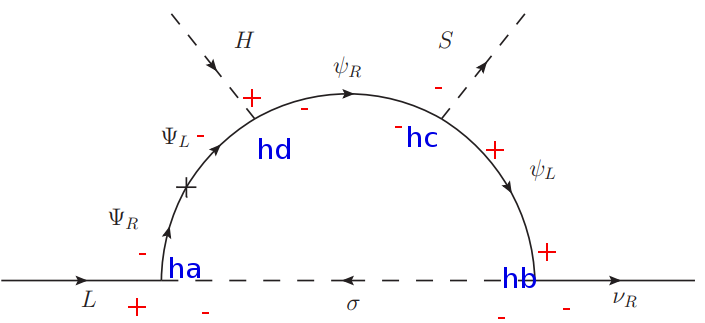

In [92]:
from IPython.display import Image
Image("/home/anferivera/Dropbox/SingletDoubletDirac/draft_SDdiracDM/figures/neutrino-GB.png", width=500)

TWO DIRAC FERMIONS IN THE LOOP:

\begin{align}
\mathcal{M}_{\alpha\beta}= \sum_{i=1}^2\sum_{k=1}^2
\dfrac{V_{k2}U_{k1}}{16\pi^2}
\times b_{\alpha i} a_{\beta i} m_{N_k} 
\times \left[\dfrac{m_{N_k}^2}{\left(m_{N_k}^2-m_{S_i}^2\right)}\ln{\left(\dfrac{m_{N_k}^2}{m_{S_i}^2}\right)}\right]\,.
\end{align}

Import the analytical rutine for compute the $\mathcal{M}_{\alpha\beta}$ version two

Example:

In [93]:
#Add to the DataFrame
xd['mn1'] = neutrino_analytic2.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,\
   xd.YRA11,xd.YRA12,xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[0]
xd['mn2'] = neutrino_analytic2.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,\
   xd.YRA11,xd.YRA12,xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[1]
xd['mn3'] = neutrino_analytic2.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,\
   xd.YRA11,xd.YRA12,xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[2]

In [94]:
##WARNING: The vev change in SPheno
xd[['mv1','mn1','mv2','mn2','mv3','mn3']][:3]

,mv1,mn1,mv2,mn2,mv3,mn3
0,4.378239e-19,4.336809e-19,8.768993e-12,8.581777e-12,4.920508e-11,5.027854e-11
1,2.004032e-19,4.336809e-19,8.532934e-12,8.510768e-12,5.094850e-11,5.108146e-11
2,1.937879e-19,4.336809e-19,8.837125e-12,9.786770e-12,4.915041e-11,4.438118e-11


# PLOTS

In [95]:
#good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

In [96]:
'''
#Experimental values for DM: Planck results 2015
e = 5
Omega = 0.1197
Omega_max=Omega + e*0.0022
Omega_min=Omega - e*0.0022
print (Omega, Omega_min,Omega_max)
# out: (0.1197, 0.1131, 0.1263)
'''

'\n#Experimental values for DM: Planck results 2015\ne = 5\nOmega = 0.1197\nOmega_max=Omega + e*0.0022\nOmega_min=Omega - e*0.0022\nprint (Omega, Omega_min,Omega_max)\n# out: (0.1197, 0.1131, 0.1263)\n'

In [97]:
#Experimental values for DM: Latest Planck results 2018
e = 3
Omega = 0.120
Omega_min=Omega - e*0.001
Omega_max=Omega + e*0.001
print(Omega, Omega_min,Omega_max)

0.12 0.11699999999999999 0.123


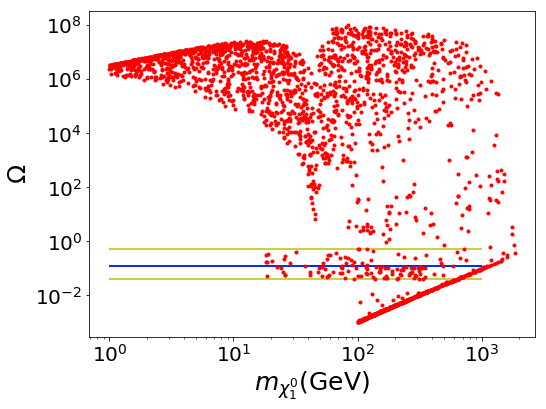

In [98]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mChi1,xd.Omega,'r.')
plt.hlines(Omega_max,1,1e3, 'c',label=r'')
plt.hlines(Omega_min,1,1e3, 'c',label=r'')
plt.hlines(Omega,1,1e3, 'b',label=r'0.11')
plt.hlines(0.5,1,1e3, 'y',label=r'0.11')
plt.hlines(0.04,1,1e3, 'y',label=r'0.11')

#plt.legend(prop={'size':15},loc='best')
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\Omega$',size=25)
#plt.xlim(1e-2,5e3)
#plt.ylim(11.2e-2,1.3e-1)

plt.show()

cuts

Maximun values: Some elements tend to be small

In [99]:
print(np.abs(xd.YRB11).max(),np.abs(xd.YRB12).max(),np.abs(xd.YRB13).max())
print(np.abs(xd.YRB21).max(),np.abs(xd.YRB22).max(),np.abs(xd.YRB23).max())

0.0582499178572 0.311368696276 0.444848149838
0.0361239915411 0.160734711873 0.18172158971


In [100]:
xDM = xd[np.logical_and(xd.Omega<0.14, xd.Omega>0.1)]
xDM1 = xd[np.logical_and(xd.Omega>Omega_max, 1>0)]
xDM2 = xd[np.logical_and(xd.Omega<Omega_min, 1>0)]

In [101]:
xDM.shape

(34, 55)

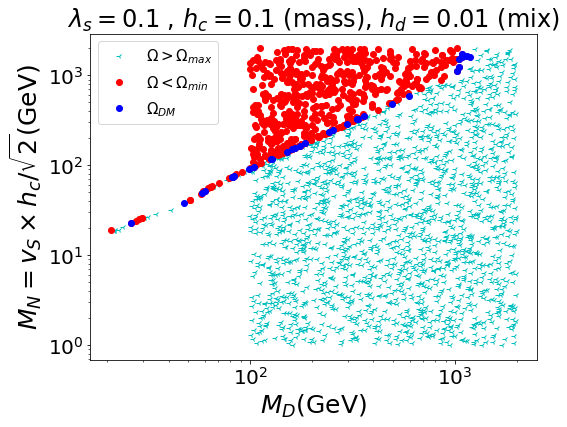

In [102]:
plt.figure(figsize=(8,6))

plt.loglog(xd.MDF, xd.vS*xd.YRC/np.sqrt(2),'c3',label=r'$\Omega > \Omega_{max}$')
plt.loglog(xDM2.MDF, xDM2.vS*xDM2.YRC/np.sqrt(2),'ro',label=r'$\Omega < \Omega_{min}$')
plt.plot(xDM.MDF, xDM.vS*xDM.YRC/np.sqrt(2),'bo',label=r'$\Omega_{DM}$')

plt.title('$\lambda_s=0.1$ , $h_c=0.1$ (mass), $h_d=0.01$ (mix)')
plt.legend(prop={'size':15},loc='best')
plt.xlabel(r'$M_{D}$(GeV)',size=25)
plt.ylabel(r'$M_N=v_S \times h_c /\sqrt{2}$(GeV)',size=25)

#plt.ylim(5,2e3)

plt.show()

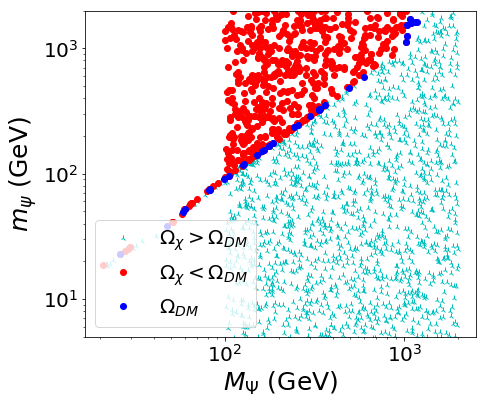

In [103]:
plt.figure(figsize=(7,6))

plt.loglog(xd.MDF, xd.vS*xd.YRC/np.sqrt(2),'c2',label=r'$\Omega_\chi > \Omega_{DM}$')
plt.loglog(xDM2.MDF, xDM2.vS*xDM2.YRC/np.sqrt(2),'ro',label=r'$\Omega_\chi < \Omega_{DM}$')
plt.plot(xDM.MDF, xDM.vS*xDM.YRC/np.sqrt(2),'bo',label=r'$\Omega_{DM}$')

plt.legend(prop={'size':20},loc='best')
plt.xlabel(r'$M_{\Psi}$ (GeV)',size=25)
plt.ylabel(r'$m_\psi$ (GeV)',size=25)

plt.ylim(5,2e3)

plt.show()

# Experimental Constrainsts after the relic density cut

In [104]:
from indirectdirect import *

# $\sigma_{SI}$

In [105]:
from scipy import interpolate

#Importar un txt
names1 = ['MDM', 'XENON1TSI']
xe = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_XENON1T/XENON1T-2018.txt')
xdxe = pd.DataFrame(xe, columns=names1)

XENON1T=interpolate.interp1d(xdxe.MDM,xdxe.XENON1TSI)

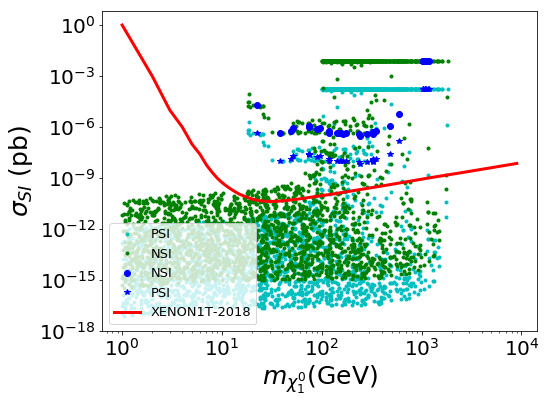

In [106]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mChi1, xd.PSI, 'c.')
plt.loglog(xd.mChi1, xd.NSI, 'g.')
plt.loglog(xDM.mChi1, xDM.NSI, 'bo')
plt.loglog(xDM.mChi1, xDM.PSI, 'b*')

#XENON-1T and LZ
#m=np.linspace(8,1000,2000)
#plt.semilogy(m,sigmaSI_LUX_f(m),'k-',lw=2,label='LUX 2015')
#n=np.linspace(11,1000,1000)
#plt.semilogy(n,sigmaSI_LZ_f(n),'m.',lw=3,label='LZ-SI prospects')
#plot XENON1T-2018
n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T-2018')


plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI} $ (pb)',size=25)
plt.legend(prop={'size':13},loc='lower left')
#plt.ylim(1e-16,3e-7)
#plt.xlim(1,5.0E3)
#plt.grid()

plt.tight_layout()
#plt.savefig('plots/sigmaSI_with_neutrino_physics.pdf')

Points near to 100 GEV

In [38]:
kk = xDM[np.logical_and(xDM.mChi1 < 300. , 1 >0)]

In [39]:
np.sqrt(2)

1.4142135623730951

In [49]:
kk.MDF -(kk.vS*kk.YRC)/np.sqrt(2)

294      7.157822
511     11.285298
602     15.707847
977      8.398983
1162     8.444492
1429     7.375982
2081    14.169222
2300     8.992424
2322    16.132058
2327     8.715616
2344    15.594226
2351     9.706781
2352    10.690240
2353     9.877682
2354    10.176291
2355    10.110583
dtype: float64

In [241]:
kk[['mChi1','mChi2','MDF','vS']]

,mChi1,mChi2,MDF,vS
294,169.607765,176.972041,176.866653,2400.045304
511,129.051853,140.469212,140.400399,1825.963267
602,289.066790,304.869786,304.820947,4088.676662
977,147.610771,156.186381,156.095603,2088.745636
1162,150.843286,159.463473,159.373207,2134.454358
1429,220.910047,228.486545,228.384618,3125.534101
2081,133.767921,148.042543,147.987184,1892.471776
2300,150.365108,159.522723,159.437709,2127.617623
2322,213.019755,229.244475,229.196446,3013.185481
2327,118.822820,127.708768,127.620564,1681.569892


# Analytic expression

In [63]:
def sigmaSI_analytic(mN,mchi,mh,vev):
    
    fN = 0.3
    mr = mN*mchi/(mN+mchi)
    Cxxh = 0.1
    
    SI = mr**2/np.pi*(Cxxh/(vev*mh**2))**2*fN*mN**2
    
    return SI

In [64]:
sigmaSI_analytic(0.9,100.,125.,246.22)

4.1578841193071225e-17

In [65]:
sigmaSI_analytic(0.939, xd.mChi1[0],xd.mh1[0],xd.vevSM[0])

4.8442896609358948e-17

In [66]:
#Parameters
fN = 0.25
v = 246.
#nucleon mass (proton)
MNC = 938.27*1e-3
## GeV-2 to cm-2
#http://www.saha.ac.in/theory/palashbaran.pal/conv.html
GeVtomin2topb = (5.06*1e+13)**(-2)*1e+36

In [67]:
xd['PSI_anal'] = ((MNC*xd.mChi1/(MNC+xd.mChi1))**2/np.pi)\
*(MNC*fN/xd.vevSM*(xd.YRD*xd.XU12*xd.XV11/(np.sqrt(2)*xd.mh1**2)))**2*GeVtomin2topb

In [68]:
xd['PSI_anal'] = ((MNC*xd.mChi1/(MNC+xd.mChi1))**2/np.pi)\
*(MNC*fN/xd.vevSM)**2*(xd.YRD*xd.XU12*xd.XV11/np.sqrt(2)*(1./xd.mh1**2))**2*GeVtomin2topb

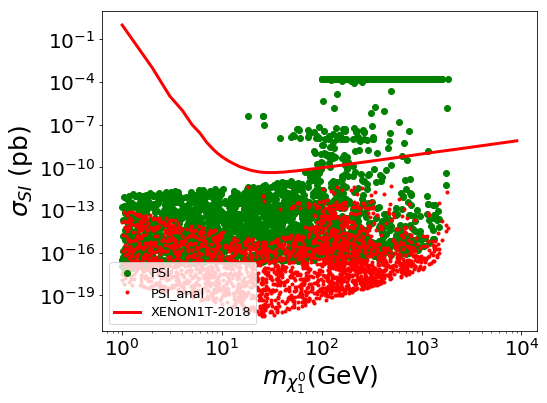

In [69]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mChi1, xd.PSI, 'go')
plt.loglog(xd.mChi1, xd.PSI_anal, 'r.')

n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T-2018')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI} $ (pb)',size=25)
plt.legend(prop={'size':13},loc='lower left')
#plt.ylim(1e-16,3e-7)

#plt.xlim(30.,2.0E3)
#plt.grid()

plt.tight_layout()
#plt.savefig('plots/sigmaSI_with_neutrino_physics.pdf')

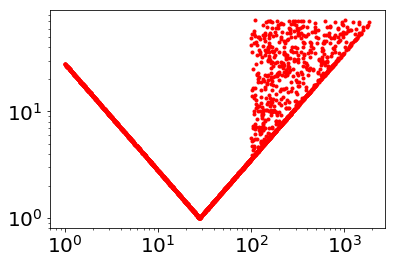

In [70]:
plt.loglog(xd.mChi1, xd.mh2/xd.mh1,'r.')

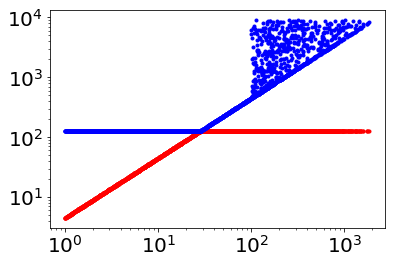

In [71]:
plt.loglog(xd.mChi1, xd.mh1,'r.')
plt.loglog(xd.mChi1, xd.mh2,'b.')

# Sigma v: $\langle\sigma v \rangle$

(1, 5000.0)

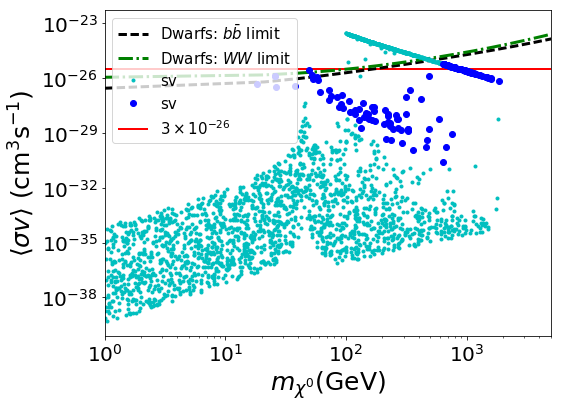

In [74]:
plt.figure(figsize=(8,6))

plt.hlines(3e-26,0.1,1e4,'r',lw=2,label=r'$3\times 10^{-26}$')
##Plot xx-->> bb --> tt
m=np.linspace(1,10000,500)
plt.semilogy(m,sigmav_bb_fit(m),'k--',lw=3,label=r'Dwarfs: $b\bar{b}$ limit')
plt.semilogy(m,sigmav_ww_fit(m),'g-.',lw=3,label=r'Dwarfs: $WW$ limit')

##falto incluir sv en el dataframe :(
plt.loglog(xd.mChi1, xd.sv , 'c.')
plt.loglog(xDM.mChi1, xDM.sv , 'bo')

plt.legend(prop={'size':15},loc='best')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\langle\sigma v\rangle $ $($cm$^{3} $s$^{-1})$',size=25)

#plt.ylim(1e-35,1e-24)
plt.xlim(1,5e3)